In [189]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

In [3]:
data = pd.read_excel("NA_Ret_Data_Clean_v1.xlsx", sheet_name = 1)

In [4]:
data.head()

,GVKEY IQ,gvkey,tic,datadate,YM,cik,CompanyName,Country,GICS_sector,GICS_industry_group,GICS_industry,NAICS_sector,NAICS_sub_sector,trt1m,marketcapUSD
0,GV_001004,1004,AIR,01/31/1990,199001,1750.0,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.121667,0
1,GV_001004,1004,AIR,02/28/1990,199002,1750.0,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.011905,0
2,GV_001004,1004,AIR,03/31/1990,199003,1750.0,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.036145,0
3,GV_001004,1004,AIR,04/30/1990,199004,1750.0,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.279166,0
4,GV_001004,1004,AIR,05/31/1990,199005,1750.0,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.011792,0


In [5]:
mapping = pd.read_excel("NA_Ret_Data_Clean_v1.xlsx", sheet_name = 2)
mapping.head()

,GVKEY IQ,gvkey,tic,fic,cik,conm,sector,industry_group,industry,sub_industry,sic,naics,NAICS6,NAICS2,NAICS3,Company Description
0,GV_001004,1004,AIR,USA,1750.0,AAR CORP,Industrials,Capital Goods,Aerospace & Defense,Aerospace & Defense,5080,423860,Transportation Equipment and Supplies (except ...,Wholesale Trade,"Merchant Wholesalers, Durable Goods",AAR Corp. provides products and services to co...
1,GV_001013,1013,ADCT.1,USA,61478.0,ADC TELECOMMUNICATIONS INC,Information Technology,Technology Hardware & Equipment,Communications Equipment,Communications Equipment,3661,334210,Telephone Apparatus Manufacturing,Manufacturing,Computer and Electronic Product Manufacturing,CommScope Connectivity LLC provides broadband ...
2,GV_001045,1045,AAL,USA,6201.0,AMERICAN AIRLINES GROUP INC,Industrials,Transportation,Airlines,Airlines,4512,481111,Scheduled Passenger Air Transportation,Transportation and Warehousing,Air Transportation,"American Airlines Group Inc., through its subs..."
3,GV_001075,1075,PNW,USA,764622.0,PINNACLE WEST CAPITAL CORP,Utilities,Utilities,Electric Utilities,Electric Utilities,4911,2211,"Electric Power Generation, Transmission and Di...",Utilities,Utilities,"Pinnacle West Capital Corporation, through its..."
4,GV_001076,1076,AAN,USA,706688.0,AARON'S INC,Consumer Discretionary,Retailing,Specialty Retail,Homefurnishing Retail,7359,532289,All Other Consumer Goods Rental,Real Estate and Rental and Leasing,Rental and Leasing Services,"Aaron's, Inc. operates as an omnichannel provi..."


In [52]:
# Transform monthly data from columns to rows
data_simple = data[['cik', 'datadate', 'trt1m']]
data_simple['date'] = pd.to_datetime(data_simple['datadate'])
data_pivot = pd.pivot_table(data_simple, 
                        values=['trt1m'],
                        index=['cik'],
                        columns=['date'],
                        aggfunc=np.sum,
                        fill_value=0)
data_pivot.head()

/Users/gracedu/vm/paferank/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


trt1m                                                         \
date   1990-01-31 1990-02-28 1990-03-31 1990-04-30 1990-05-31 1990-06-30   
cik                                                                        
1750.0  -0.121667  -0.011905  -0.036145  -0.279166  -0.011792   0.129412   
1800.0  -0.038971  -0.013462   0.025341   0.021597   0.121723   0.095159   
2034.0  -0.033898   0.035088  -0.050847   0.035714  -0.017241  -0.046316   
2135.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2488.0  -0.079365   0.137931   0.106061  -0.041096   0.200000  -0.095238   

                                                    ...                        \
date   1990-07-31 1990-08-31 1990-09-30 1990-10-31  ... 2019-05-31 2019-06-30   
cik                                                 ...                         
1750.0  -0.088750  -0.270115  -0.228346  -0.133061  ...  -0.108972   0.222665   
1800.0   0.066098  -0.080460  -0.021875   0.053291  ...  -0.043112   0.104689   
2034.0  -0.076923  -0.041667  -0.065217   0.000000  ...   0.049836  -0.031855   
2135.0   0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
2488.0  -0.263158  -0.232143  -0.046512  -0.243902  ...  -0.007962   0.107990   

                                                                          \
date   2019-07-31 2019-08-31 2019-09-30 2019-10-31 2019-11-30 2019-12-31   
cik                                                                        
1750.0   0.139848   0.026278  -0.040736   0.014924   0.070419   0.009174   
1800.0   0.039477  -0.020436  -0.019339   0.003107   0.022007   0.016501   
2034.0   0.145161   0.042254  -0.459459   0.147500   0.000000   0.000000   
2135.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2488.0   0.002634   0.032841  -0.078219   0.170404   0.153846   0.171392   

                              
date   2020-01-31 2020-02-29  
cik                           
1750.0  -0.054213  -0.188586  
1800.0   0.007368  -0.116020  
2034.0   0.000000   0.000000  
2135.0   0.000000   0.000000  
2488.0   0.024858  -0.032340  

[5 rows x 362 columns]

In [53]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(data_pivot)
norm_data = pd.DataFrame(scaler.transform(data_pivot), index=data_pivot.index, columns=data_pivot.columns)
norm_data.head()

trt1m                                                         \
date   1990-01-31 1990-02-28 1990-03-31 1990-04-30 1990-05-31 1990-06-30   
cik                                                                        
1750.0  -0.051155  -0.005005  -0.015197  -0.117375  -0.004958   0.054411   
1800.0  -0.035695  -0.012330   0.023211   0.019782   0.111492   0.087160   
2034.0  -0.013959   0.014449  -0.020938   0.014706  -0.007100  -0.019072   
2135.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2488.0  -0.021992   0.038220   0.029389  -0.011387   0.055419  -0.026390   

                                                    ...                        \
date   1990-07-31 1990-08-31 1990-09-30 1990-10-31  ... 2019-05-31 2019-06-30   
cik                                                 ...                         
1750.0  -0.037315  -0.113569  -0.096008  -0.055945  ...  -0.045817   0.093619   
1800.0   0.060542  -0.073697  -0.020036   0.048812  ...  -0.039488   0.095889   
2034.0  -0.031675  -0.017158  -0.026855   0.000000  ...   0.020522  -0.013117   
2135.0   0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
2488.0  -0.072919  -0.064325  -0.012888  -0.067584  ...  -0.002206   0.029923   

                                                                          \
date   2019-07-31 2019-08-31 2019-09-30 2019-10-31 2019-11-30 2019-12-31   
cik                                                                        
1750.0   0.058799   0.011049  -0.017127   0.006275   0.029607   0.003857   
1800.0   0.036159  -0.018718  -0.017713   0.002846   0.020157   0.015114   
2034.0   0.059775   0.017399  -0.189196   0.060738   0.000000   0.000000   
2135.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2488.0   0.000730   0.009100  -0.021674   0.047218   0.042630   0.047492   

                              
date   2020-01-31 2020-02-29  
cik                           
1750.0  -0.022794  -0.079291  
1800.0   0.006749  -0.106268  
2034.0   0.000000   0.000000  
2135.0   0.000000   0.000000  
2488.0   0.006888  -0.008961  

[5 rows x 362 columns]

top components 5 for each dimension
   Dimension 1  Dimension 2
0       0.2698       0.2905
1       0.1763       0.1929
2       0.1754       0.1803
3       0.1689       0.1691
4       0.1648       0.1666
                    Dimension 1                   Dimension 2
0  (trt1m, 2008-10-31 00:00:00)  (trt1m, 2000-02-29 00:00:00)
1  (trt1m, 2008-11-30 00:00:00)  (trt1m, 2009-01-31 00:00:00)
2  (trt1m, 2019-01-31 00:00:00)  (trt1m, 2001-01-31 00:00:00)
3  (trt1m, 2009-01-31 00:00:00)  (trt1m, 1999-12-31 00:00:00)
4  (trt1m, 2009-02-28 00:00:00)  (trt1m, 2018-12-31 00:00:00)


/Users/gracedu/vm/paferank/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


,Explained Variance,"(trt1m, 1990-01-31 00:00:00)","(trt1m, 1990-02-28 00:00:00)","(trt1m, 1990-03-31 00:00:00)","(trt1m, 1990-04-30 00:00:00)","(trt1m, 1990-05-31 00:00:00)","(trt1m, 1990-06-30 00:00:00)","(trt1m, 1990-07-31 00:00:00)","(trt1m, 1990-08-31 00:00:00)","(trt1m, 1990-09-30 00:00:00)",...,"(trt1m, 2019-05-31 00:00:00)","(trt1m, 2019-06-30 00:00:00)","(trt1m, 2019-07-31 00:00:00)","(trt1m, 2019-08-31 00:00:00)","(trt1m, 2019-09-30 00:00:00)","(trt1m, 2019-10-31 00:00:00)","(trt1m, 2019-11-30 00:00:00)","(trt1m, 2019-12-31 00:00:00)","(trt1m, 2020-01-31 00:00:00)","(trt1m, 2020-02-29 00:00:00)"
Dimension 1,0.0416,0.0331,-0.0113,-0.0174,0.0138,-0.0425,-0.0016,0.0174,0.0649,0.0484,...,-0.1066,0.0753,-0.0149,-0.0727,0.0251,-0.0111,0.020,0.0673,-0.0463,-0.1216
Dimension 2,0.0326,0.0230,0.0049,0.0010,0.0103,-0.0020,0.0084,-0.0043,0.0208,0.0081,...,0.1017,-0.0699,-0.0070,0.0781,-0.0838,-0.0068,-0.029,-0.0278,0.0581,0.1453


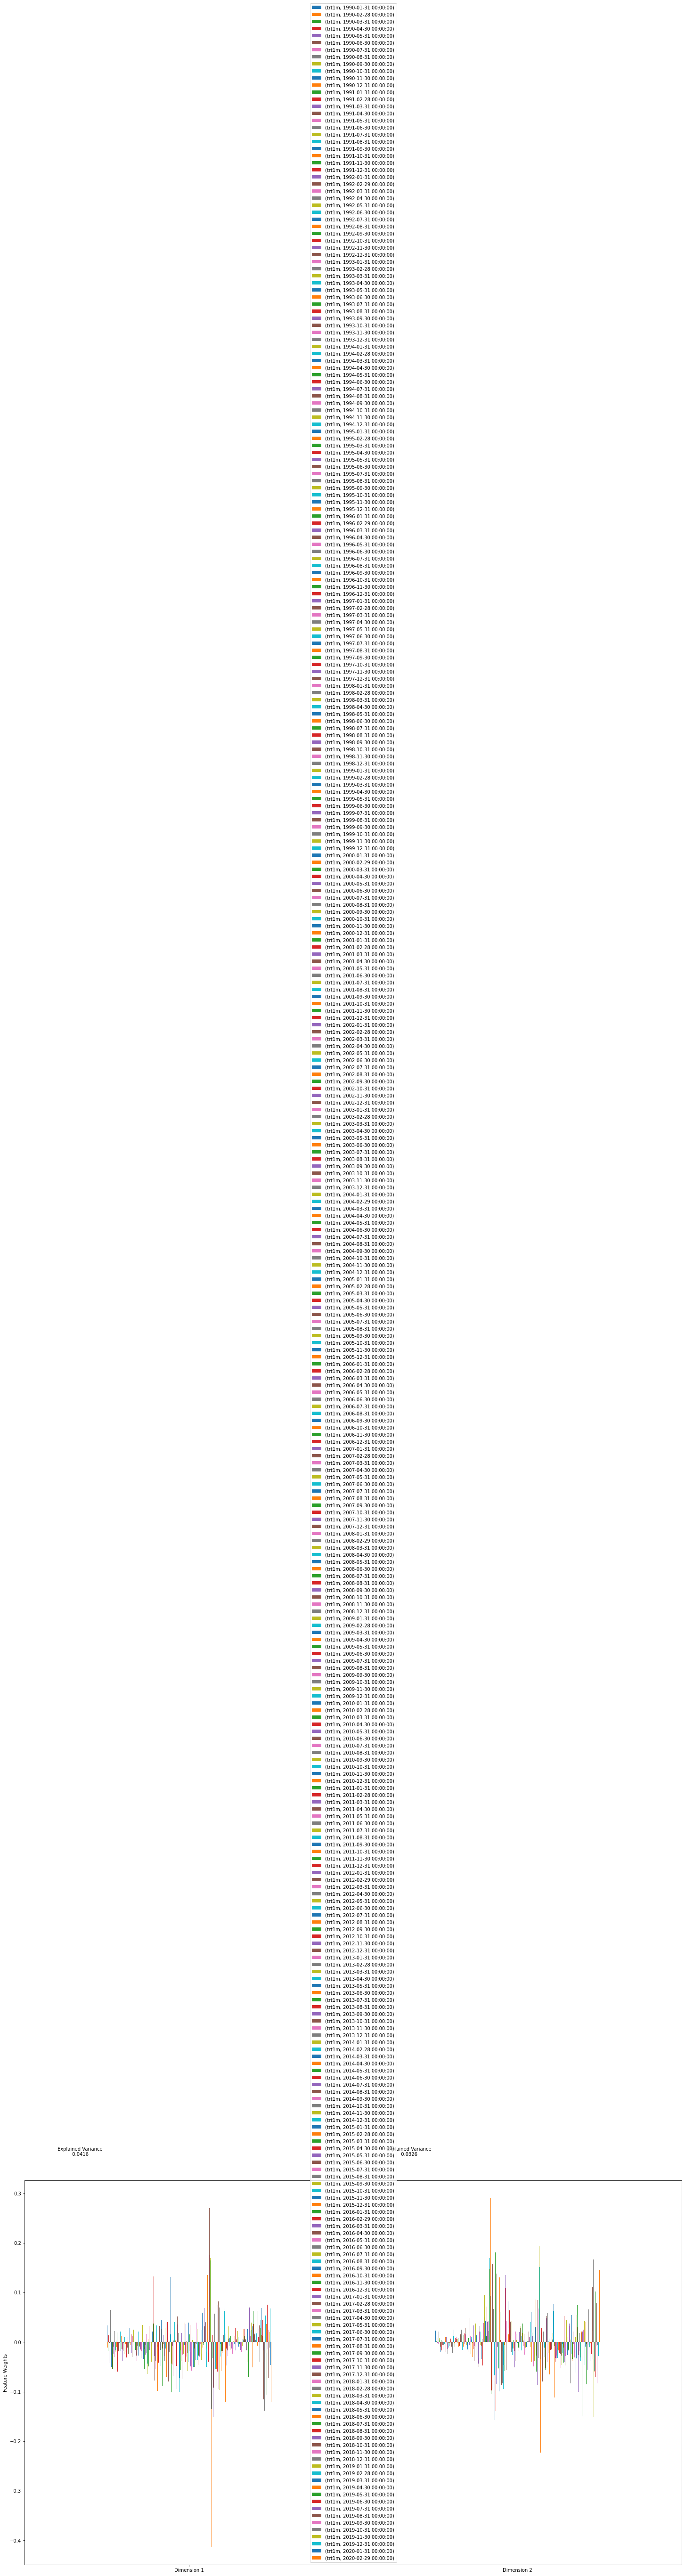

In [180]:
from sklearn.decomposition import PCA 
pca_model = PCA(n_components = 2, svd_solver = "full")
reduced_data = pd.DataFrame(pca_model.fit_transform(norm_data), index=norm_data.index, columns=['first_dim', 'second_dim'])



pca_results(norm_data, pca_model, 5)
# pca_model.explained_variance_ratio_

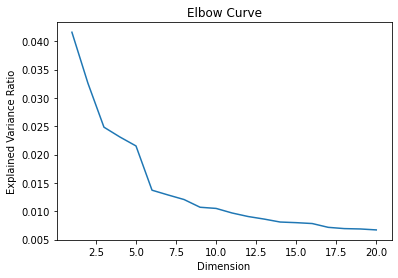

In [55]:
dimension = 20
pca_10dim = PCA(n_components = dimension, svd_solver = "full")
pca_data_10dim = pca_10dim.fit_transform(norm_data)
plt.plot(range(1,dimension+1), pca_10dim.explained_variance_ratio_)
plt.title("Elbow Curve")
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [38]:
def pca_results(good_data, pca, n):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions
    components_transpose = components.T
    
# Get the top 3 values 
    print ("top components %s for each dimension" %n)
    def sorted(s, num):
      tmp = s.sort_values(ascending=False)[:num]  # earlier s.order(..)
      tmp.index = range(num)
      return tmp
    top_values = components_transpose.apply(lambda x: sorted(x, n))
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(top_values)
    
#   top 3 values' index map
    a = np.argsort(components_transpose.values, axis=0)[-1:-1-n:-1]
    b = pd.DataFrame(components_transpose.index[a], columns=components_transpose.columns)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(b)

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (25,15))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [138]:
# Dynamic timeseries warping with fixed window length
def DTWDistanceOpt(s1, s2,w):
    DTW={}

    w = max(w, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])


def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])


# Dynamic timeseries warping with LB_koegh
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):

        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])

        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2

    return math.sqrt(LB_sum)


In [139]:
s1 = norm_data.iloc[0, :]
s2 = norm_data.iloc[1, :]
distance = DTWDistance(s1, s2)
distance

0.7192293864980215

In [197]:
import random

def k_means_clust(data,num_clust,num_iter,w=5):
    seq_len = len(data[0])
    num_data = len(data)
    centroids=random.sample(data,num_clust)
#     sample_index = np.random.choice(num_data, num_clust)
#     centroids = dict(zip(sample_index, [data[sample] for sample in sample_index]))
#     print(centroids)
    counter=0
    for n in range(num_iter):
        print(f'STARTING ITERATION {n}')
        counter+=1
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
#                 cur_dist=DTWDistance(i,j,w)
                cur_dist=DTWDistance(i,j)
                if cur_dist<min_dist:
                    min_dist=cur_dist
                    closest_clust=c_ind
            print(f'{n} iter: for data sample {ind}, the closest centroid is {closest_clust}')
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[ind]
        print(assignments)

        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=[0]*seq_len
            for k in assignments[key]:
                clust_sum+= data[k]
            if assignments[key]:
                centroids[key]=[m/len(assignments[key]) for m in clust_sum]
#         print(centroids)

    return centroids, assignments

In [195]:
from sklearn.model_selection import train_test_split
split_data = train_test_split(norm_data, test_size=0.5, random_state=42)
train_data = split_data[0]
test_data = split_data[1]
print(train_data.shape)
print(test_data.shape)

(1350, 362)
(1351, 362)


In [ ]:
norm_data.sample(n=3, random_state=1)
new_centroids, new_assignments = k_means_clust(train_data.values.tolist(), 10, 5, w = 24)

STARTING ITERATION 0
0 iter: for data sample 0, the closest centroid is 6
0 iter: for data sample 1, the closest centroid is 3
0 iter: for data sample 2, the closest centroid is 8
0 iter: for data sample 3, the closest centroid is 9
0 iter: for data sample 4, the closest centroid is 2
0 iter: for data sample 5, the closest centroid is 1
0 iter: for data sample 6, the closest centroid is 6
0 iter: for data sample 7, the closest centroid is 6
0 iter: for data sample 8, the closest centroid is 4
0 iter: for data sample 9, the closest centroid is 4
0 iter: for data sample 10, the closest centroid is 1
0 iter: for data sample 11, the closest centroid is 8
0 iter: for data sample 12, the closest centroid is 3
0 iter: for data sample 13, the closest centroid is 4
0 iter: for data sample 14, the closest centroid is 5
0 iter: for data sample 15, the closest centroid is 9
0 iter: for data sample 16, the closest centroid is 6
0 iter: for data sample 17, the closest centroid is 2
0 iter: for data 

In [82]:
data_copy = norm_data.copy()
data_copy.iloc[:5, :].values.tolist()

array([[-0.0511546 , -0.00500543, -0.01519708, ...,  0.00385719,
        -0.02279372, -0.07929053],
       [-0.03569528, -0.01233045,  0.02321096, ...,  0.015114  ,
         0.00674868, -0.10626791],
       [-0.01395855,  0.01444857, -0.02093782, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0219915 ,  0.03821974,  0.02938878, ...,  0.04749156,
         0.00688798, -0.00896119]])

trt1m                                                         \
date      1990-01-31 1990-02-28 1990-03-31 1990-04-30 1990-05-31 1990-06-30   
cik                                                                           
1066134.0   0.000000    0.00000   0.000000   0.000000   0.000000   0.000000   
1130866.0   0.000000    0.00000   0.000000   0.000000   0.000000   0.000000   
107263.0   -0.060949   -0.02948   0.018522  -0.032047   0.035982  -0.028709   

                                                       ...             \
date      1990-07-31 1990-08-31 1990-09-30 1990-10-31  ... 2019-05-31   
cik                                                    ...              
1066134.0    0.00000   0.000000   0.000000   0.000000  ...   0.000000   
1130866.0    0.00000   0.000000   0.000000   0.000000  ...   0.000000   
107263.0    -0.01914  -0.046334   0.009007   0.037543  ...  -0.031618   

                                                                             \
date      2019-06-30 2019-07-31 2019-08-31 2019-09-30 2019-10-31 2019-11-30   
cik                                                                           
1066134.0   0.000000   0.000000   0.000000   0.000000    0.00000   0.000000   
1130866.0   0.000000   0.000000   0.000000   0.000000    0.00000   0.000000   
107263.0    0.035522  -0.055698  -0.019388   0.016349   -0.03341   0.008441   

                                            
date      2019-12-31 2020-01-31 2020-02-29  
cik                                         
1066134.0     0.0000   0.000000    0.00000  
1130866.0     0.0000   0.000000    0.00000  
107263.0      0.0279  -0.058677   -0.03641  

[3 rows x 362 columns]

In [148]:
assignments = {3: [0, 9, 26, 30, 31, 36, 46, 54, 59, 69, 72, 83, 91, 93, 100, 109, 112, 120, 123, 126, 141, 153, 155, 162, 174, 180, 186, 192, 197, 201, 210, 211, 218, 220, 232, 234, 239, 240, 242, 254, 256, 258, 259, 260, 262, 271, 283, 293, 294, 297, 298, 306, 311, 316, 323, 334, 346, 347, 356, 362, 372, 375, 384, 395, 399, 402, 406, 408, 419, 420, 422, 425, 438, 443, 448, 451, 454, 458, 460, 462, 464, 465, 470, 481, 490, 527, 528, 531, 538, 539, 545, 549, 557, 560, 562, 563, 570, 572, 581, 583, 585, 591, 601, 613, 644, 645, 654, 661, 677, 706, 712, 735, 737, 740, 749, 755, 776, 789, 814, 836, 849, 882, 885, 897, 904, 907, 928, 933, 938, 958, 971, 986], 7: [1, 35, 43, 48, 94, 98, 103, 129, 131, 135, 171, 187, 195, 213, 214, 226, 231, 243, 299, 314, 335, 353, 379, 383, 397, 445, 468, 475, 478, 487, 492, 509, 534, 552, 614, 618, 619, 620, 630, 658, 680, 691, 699, 707, 741, 780, 843, 875, 880, 881, 888, 901, 911, 922, 935, 957, 963, 985, 990], 6: [2, 7, 10, 14, 17, 19, 56, 58, 81, 102, 106, 110, 124, 127, 134, 136, 137, 139, 165, 168, 190, 193, 200, 208, 209, 233, 266, 269, 272, 282, 285, 287, 292, 304, 320, 339, 343, 358, 360, 377, 381, 392, 396, 404, 405, 410, 431, 441, 518, 520, 530, 544, 564, 567, 568, 575, 582, 632, 656, 657, 659, 660, 664, 678, 683, 698, 700, 705, 714, 734, 751, 759, 766, 771, 812, 817, 820, 824, 868, 870, 873, 890, 903, 908, 916, 925, 956, 993, 996], 4: [3, 11, 23, 32, 51, 89, 121, 132, 142, 204, 291, 305, 312, 318, 338, 341, 350, 351, 352, 354, 385, 389, 390, 439, 456, 459, 498, 505, 526, 541, 556, 558, 589, 615, 639, 643, 648, 670, 675, 688, 713, 716, 721, 727, 758, 772, 779, 783, 795, 796, 807, 808, 850, 854, 863, 869, 884, 889, 893, 900, 912, 929, 955, 980, 995, 997], 8: [4, 6, 13, 25, 28, 34, 37, 38, 39, 40, 41, 44, 45, 49, 52, 53, 57, 63, 64, 73, 78, 79, 80, 85, 96, 97, 104, 113, 115, 119, 138, 143, 148, 150, 158, 166, 169, 173, 177, 179, 183, 188, 189, 191, 194, 203, 212, 217, 219, 222, 223, 227, 229, 230, 236, 238, 241, 246, 247, 248, 252, 255, 264, 265, 270, 276, 281, 295, 300, 313, 317, 319, 321, 322, 324, 326, 327, 332, 333, 336, 344, 349, 355, 357, 361, 365, 366, 368, 374, 378, 387, 388, 394, 412, 413, 423, 424, 428, 430, 435, 440, 442, 449, 452, 453, 457, 463, 473, 474, 477, 483, 486, 488, 489, 491, 493, 494, 500, 501, 511, 515, 521, 524, 525, 535, 537, 540, 542, 546, 548, 550, 553, 555, 559, 565, 573, 576, 584, 586, 587, 590, 593, 595, 597, 598, 604, 607, 608, 609, 610, 611, 621, 625, 626, 633, 634, 638, 640, 641, 653, 655, 662, 667, 669, 672, 681, 685, 689, 692, 694, 696, 702, 703, 710, 717, 720, 722, 724, 731, 733, 739, 742, 745, 747, 748, 764, 765, 768, 770, 778, 787, 790, 799, 802, 811, 818, 822, 823, 834, 835, 838, 841, 848, 851, 852, 853, 856, 865, 866, 867, 871, 874, 876, 883, 886, 891, 894, 898, 909, 914, 917, 918, 923, 927, 931, 940, 943, 949, 953, 959, 960, 965, 966, 967, 973, 976, 978, 982, 983, 984, 992, 998], 2: [5, 21, 24, 67, 68, 70, 82, 84, 90, 122, 154, 202, 237, 261, 263, 273, 277, 279, 289, 369, 371, 376, 398, 407, 409, 427, 436, 447, 450, 467, 471, 485, 499, 514, 523, 532, 536, 551, 617, 627, 629, 631, 649, 652, 673, 674, 676, 684, 693, 695, 704, 709, 715, 718, 719, 728, 729, 732, 762, 769, 782, 785, 791, 794, 798, 800, 801, 803, 809, 815, 816, 819, 831, 833, 847, 877, 879, 887, 906, 919, 921, 937, 962, 968, 987, 994], 0: [8, 12, 15, 20, 27, 42, 55, 62, 77, 86, 105, 107, 145, 146, 147, 151, 157, 159, 164, 167, 170, 181, 182, 196, 199, 207, 215, 221, 224, 225, 228, 235, 244, 250, 253, 267, 268, 275, 280, 284, 286, 296, 301, 303, 307, 309, 367, 370, 380, 382, 386, 421, 426, 432, 433, 434, 455, 461, 479, 503, 508, 517, 543, 547, 554, 561, 566, 569, 580, 588, 594, 596, 599, 605, 606, 616, 623, 624, 628, 636, 637, 646, 647, 650, 651, 663, 665, 666, 668, 686, 690, 701, 708, 725, 730, 750, 757, 760, 761, 763, 781, 788, 804, 805, 810, 827, 832, 837, 839, 840, 842, 844, 859, 860, 862, 878, 895, 902, 905, 913, 926, 930, 939, 942, 945, 951, 952, 954, 961, 969, 970, 974, 975, 979, 989, 991, 999], 1: [16, 60, 61, 71, 75, 87, 92, 108, 117, 118, 125, 144, 156, 163, 175, 176, 178, 185, 198, 245, 257, 274, 290, 302, 325, 330, 331, 337, 342, 345, 359, 364, 373, 393, 400, 401, 415, 437, 466, 472, 476, 480, 497, 513, 516, 522, 533, 577, 578, 603, 671, 679, 726, 736, 754, 756, 777, 784, 786, 806, 813, 829, 845, 857, 858, 864, 899, 910, 915, 924, 932, 944, 972], 5: [18, 22, 65, 74, 76, 101, 114, 130, 133, 140, 172, 340, 417, 502, 574, 622, 642, 687, 711, 723, 738, 752, 753, 767, 773, 821, 828, 855, 896, 941, 946, 947, 964, 981], 9: [29, 33, 47, 50, 66, 88, 95, 99, 111, 116, 128, 149, 152, 160, 161, 184, 205, 206, 216, 249, 251, 278, 288, 308, 310, 315, 328, 329, 348, 363, 391, 403, 411, 414, 416, 418, 429, 444, 446, 469, 482, 484, 495, 496, 504, 506, 507, 510, 512, 519, 529, 571, 579, 592, 600, 602, 612, 635, 682, 697, 743, 744, 746, 774, 775, 792, 793, 797, 825, 826, 830, 846, 861, 872, 892, 920, 934, 936, 948, 950, 977, 988]}

In [158]:
print(assignmendferts[0])

[8, 12, 15, 20, 27, 42, 55, 62, 77, 86, 105, 107, 145, 146, 147, 151, 157, 159, 164, 167, 170, 181, 182, 196, 199, 207, 215, 221, 224, 225, 228, 235, 244, 250, 253, 267, 268, 275, 280, 284, 286, 296, 301, 303, 307, 309, 367, 370, 380, 382, 386, 421, 426, 432, 433, 434, 455, 461, 479, 503, 508, 517, 543, 547, 554, 561, 566, 569, 580, 588, 594, 596, 599, 605, 606, 616, 623, 624, 628, 636, 637, 646, 647, 650, 651, 663, 665, 666, 668, 686, 690, 701, 708, 725, 730, 750, 757, 760, 761, 763, 781, 788, 804, 805, 810, 827, 832, 837, 839, 840, 842, 844, 859, 860, 862, 878, 895, 902, 905, 913, 926, 930, 939, 942, 945, 951, 952, 954, 961, 969, 970, 974, 975, 979, 989, 991, 999]


In [159]:
cik_assignment = {}
for key in assignments.keys():
    print(f'cluster {key} has {len(assignments[key])} elements')
    cik_assignment[key] = list(norm_data.iloc[assignments[key]].index)

print(cik_assignment[0])

cluster 3 has 132 elements
cluster 7 has 59 elements
cluster 6 has 89 elements
cluster 4 has 66 elements
cluster 8 has 242 elements
cluster 2 has 86 elements
cluster 0 has 137 elements
cluster 1 has 73 elements
cluster 5 has 34 elements
cluster 9 has 82 elements
[3116.0, 4281.0, 4962.0, 5768.0, 6885.0, 9342.0, 12978.0, 15615.0, 18349.0, 19584.0, 24491.0, 24741.0, 35214.0, 35527.0, 36029.0, 36270.0, 37996.0, 38725.0, 39899.0, 40533.0, 40888.0, 45876.0, 45919.0, 49196.0, 49754.0, 51434.0, 54991.0, 56679.0, 57083.0, 57131.0, 57725.0, 60519.0, 62996.0, 64040.0, 65011.0, 67887.0, 68270.0, 70318.0, 71691.0, 72331.0, 72573.0, 74208.0, 75288.0, 75677.0, 76605.0, 77281.0, 93389.0, 93456.0, 96223.0, 96763.0, 97216.0, 105319.0, 106640.0, 108385.0, 108516.0, 109156.0, 217346.0, 277595.0, 314808.0, 350797.0, 352363.0, 354707.0, 703604.0, 705432.0, 708955.0, 712770.0, 715787.0, 716643.0, 719866.0, 722104.0, 723612.0, 724571.0, 726728.0, 729922.0, 729986.0, 731939.0, 736822.0, 737572.0, 739878.0, 742

In [162]:
mapping.set_index('cik', inplace = True)

In [168]:
mapping_copy = mapping.copy()
cluster_data = None
for key in cik_assignment.keys():
    temp_cluster_data = mapping_copy.loc[cik_assignment[key]]
    temp_cluster_data['cluster'] = key
    temp_cluster_data.reset_index(inplace = True)
    if cluster_data is None:
        cluster_data = temp_cluster_data
    else:
        cluster_data = pd.concat([cluster_data, temp_cluster_data], ignore_index = True)
cluster_data.shape

(1000, 17)

In [186]:
dimentional_data = pd.merge(left = cluster_data, right = reduced_data, how = 'inner', left_index=True, right_index=True)

In [178]:
cluster_agg_data = cluster_data.groupby(['cluster', 'industry_group']).agg(cnt = ('cik', 'count'))
pd.pivot_table(cluster_agg_data, 
                        values=['cnt'],
                        index=['industry_group'],
                        columns=['cluster'],
                        aggfunc=np.sum,
                        fill_value=0)

cnt                           \
cluster                                          0   1   2   3  4  5   6  7   
industry_group                                                                
Automobiles & Components                         6   2   0   0  0  1   0  1   
Banks                                           15  14   5   9  0  0   5  1   
Capital Goods                                   21   9   9  30  6  1   8  3   
Commercial  & Professional Services              4   2   4   8  2  1   6  1   
Consumer Durables & Apparel                     13   3   3   5  2  1   5  0   
Consumer Services                                5   2   9   0  2  2   3  2   
Diversified Financials                           8   0   1   2  2  1   3  2   
Energy                                           7   1   7  16  1  4   3  2   
Food & Staples Retailing                         0   1   1   1  1  0   4  1   
Food, Beverage & Tobacco                         3   1   3   3  3  1   6  3   
Health Care Equipment & Services                 7   1  12   5  7  2   2  7   
Household & Personal Products                    0   0   1   1  0  0   1  3   
Insurance                                        4   8   2   4  1  2   3  3   
Materials                                        9   5  10  18  2  3   3  4   
Media                                            1   0   0   0  1  0   0  0   
Media & Entertainment                            5   2   0   3  0  1   2  0   
Pharmaceuticals, Biotechnology & Life Sciences   6   4   2   1  5  3   2  4   
Real Estate                                      6   9   3   3  0  1   2  1   
Retailing                                        9   2   3   5  3  3   7  2   
Semiconductors & Semiconductor Equipment         0   0   3   0  9  1   1  2   
Software & Services                              1   0   2   1  8  1   1  6   
Technology Hardware & Equipment                  5   3   3   3  6  2   7  3   
Telecommunication Services                       0   2   0   0  1  0   5  4   
Transportation                                   1   1   3   9  1  1   0  2   
Utilities                                        1   1   0   5  3  2  10  2   

                                                        
cluster                                          8   9  
industry_group                                          
Automobiles & Components                         5   0  
Banks                                            5  15  
Capital Goods                                   24   9  
Commercial  & Professional Services              7   2  
Consumer Durables & Apparel                     12   2  
Consumer Services                                5   3  
Diversified Financials                           3   2  
Energy                                          17   9  
Food & Staples Retailing                         2   1  
Food, Beverage & Tobacco                        12   3  
Health Care Equipment & Services                20   6  
Household & Personal Products                    4   1  
Insurance                                        6   3  
Materials                                       12   5  
Media                                            0   0  
Media & Entertainment                            2   0  
Pharmaceuticals, Biotechnology & Life Sciences  12   0  
Real Estate                                      5   2  
Retailing                                       11   0  
Semiconductors & Semiconductor Equipment        21   2  
Software & Services                             15   3  
Technology Hardware & Equipment                 26   4  
Telecommunication Services                       6   1  
Transportation                                   5   3  
Utilities                                        5   6

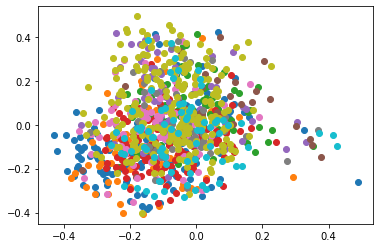

In [191]:
groups = dimentional_data.groupby("cluster")
for name, group in groups:
    plt.plot(group["first_dim"], group["second_dim"], marker="o",linestyle="", label=name)